In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv('./train.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


every column has nan values

In [3]:
titanic[titanic['Age'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 19 to 8685
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   178 non-null    object 
 1   HomePlanet    175 non-null    object 
 2   CryoSleep     175 non-null    object 
 3   Cabin         175 non-null    object 
 4   Destination   175 non-null    object 
 5   Age           178 non-null    float64
 6   VIP           172 non-null    object 
 7   RoomService   174 non-null    float64
 8   FoodCourt     176 non-null    float64
 9   ShoppingMall  172 non-null    float64
 10  Spa           175 non-null    float64
 11  VRDeck        173 non-null    float64
 12  Name          172 non-null    object 
 13  Transported   178 non-null    bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 19.6+ KB


178 entries with age == 0 is weird


In [4]:
titanic['total_expenses'] = titanic.FoodCourt + titanic.ShoppingMall + titanic.Spa + titanic.VRDeck + titanic.RoomService

titanic_t = titanic[titanic.Transported == True]
titanic_nt = titanic[titanic.Transported == False]

In [5]:
def histplt(vals: list):
    plt.figure(figsize=(10,10))
    plt.hist(vals, stacked=False, bins=20)
    plt.legend(['Transported', 'Not Transported'])

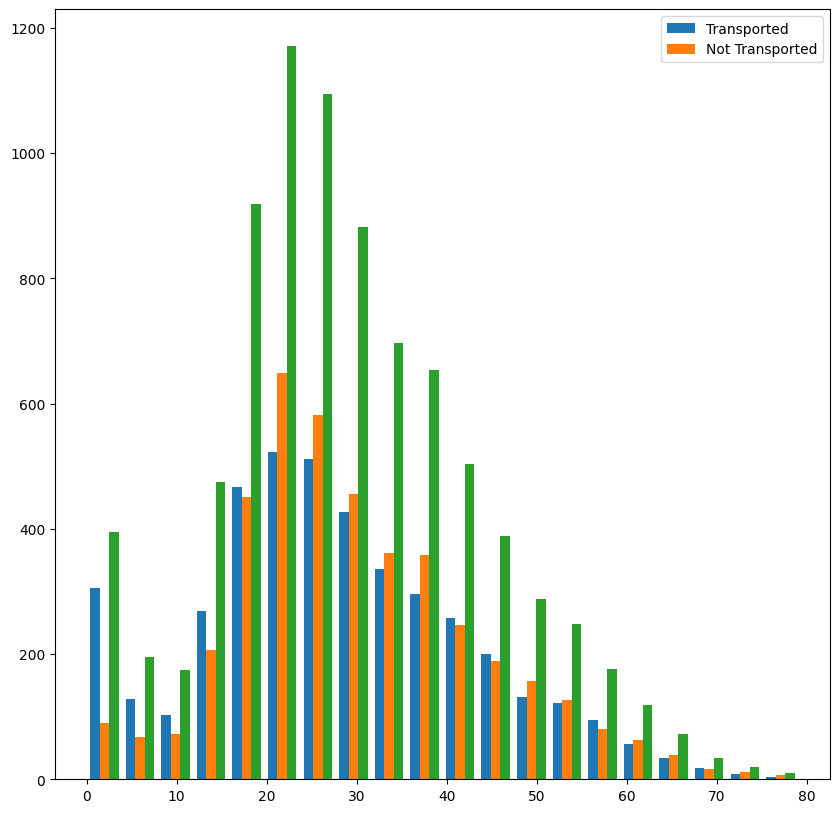

In [6]:
histplt([titanic_t.Age, titanic_nt.Age, titanic.Age])

below 20 more likely to get transported, equals out > ~60

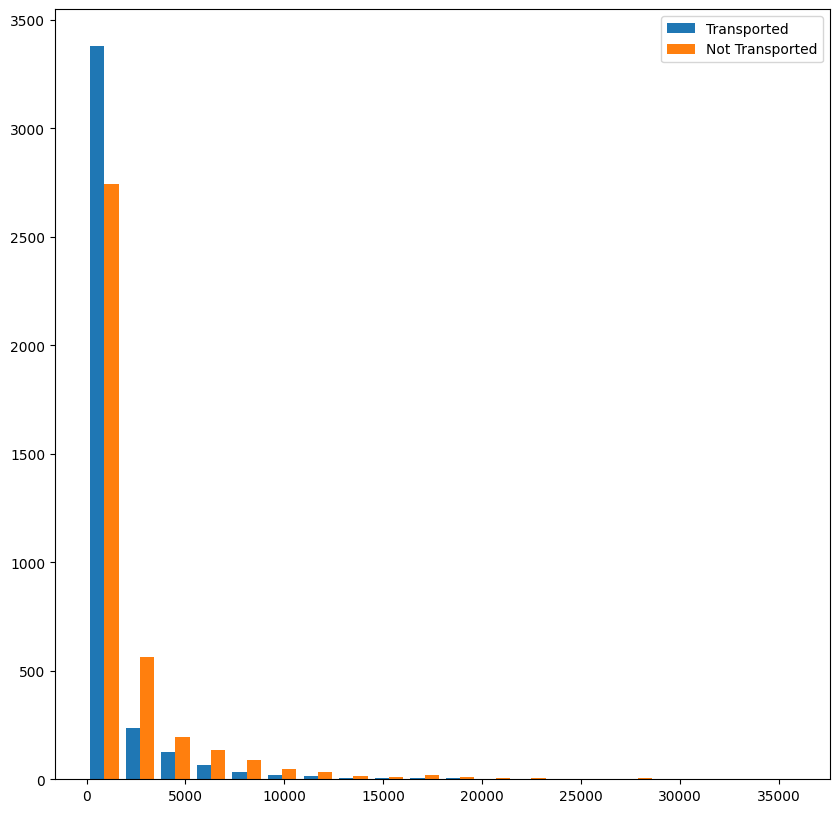

In [7]:
histplt([titanic_t.total_expenses, titanic_nt.total_expenses])

PassengerId       0.021491
CryoSleep         0.468645
Age              -0.075026
VIP              -0.037650
RoomService      -0.244611
FoodCourt         0.046566
ShoppingMall      0.010141
Spa              -0.221131
VRDeck           -0.207075
Transported       1.000000
total_expenses   -0.197671
Name: Transported, dtype: float64


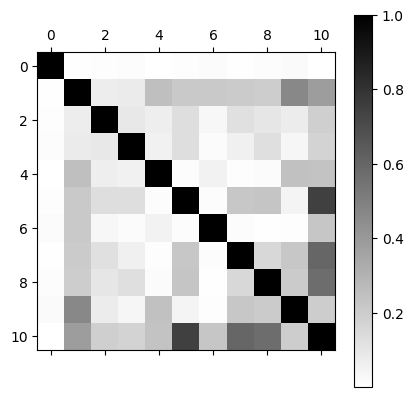

In [8]:
print(titanic.drop(['Name', 'Destination', 'HomePlanet', 'Cabin'], axis=1).corr()['Transported'])
h = plt.matshow(titanic.drop(['Name', 'Destination', 'HomePlanet', 'Cabin'], axis=1).corr().abs(), cmap='binary')
plt.colorbar(h)

cryosleep is a good feature, a

In [9]:
titanic[titanic['VIP'] == True].total_expenses.median()

2856.0

In [10]:
titanic[titanic['VIP'] == False].total_expenses.median()


722.0

<Axes: xlabel='Age', ylabel='total_expenses'>

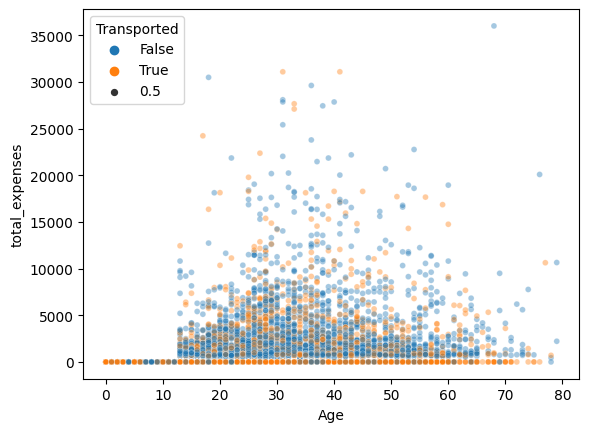

In [11]:
sns.scatterplot(titanic, x='Age', y='total_expenses', hue='Transported', alpha=0.4, size=0.5)

In [12]:
print(titanic[titanic['Age'] < 13].total_expenses.max())
print(titanic[titanic['Age'] < 14].total_expenses.max())


0.0
12439.0


therefore children below 13 arent allowed to spend
age na values where total expenses = 0 can be replaced by the mode of ages below 13

In [13]:
titanic[titanic['Age'] < 13].Age.mode()

0    0.0
Name: Age, dtype: float64

bruh lets do metdian instead

In [14]:
titanic[titanic['Age'] < 13].Age.median()

4.0

In [15]:
len(titanic_t)

4378

In [16]:
len(titanic_nt)

4315

In [17]:
titanic.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [18]:
for i in ['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e']:
    print(i)
    print(len(titanic_t[titanic_t.Destination == i]), len(titanic_nt[titanic_nt.Destination == i]))

TRAPPIST-1e
2787 3128
PSO J318.5-22
401 395
55 Cancri e
1098 702


In [19]:
titanic['group'] = pd.cut(titanic.Age, bins=[0, 13, 25, 50, 75, np.inf], labels=[0, 1, 2, 3, 4])

In [20]:
titanic.groupby('group').Destination.value_counts()

group  Destination  
0      TRAPPIST-1e       545
       55 Cancri e       152
       PSO J318.5-22      63
1      TRAPPIST-1e      1961
       55 Cancri e       571
       PSO J318.5-22     355
2      TRAPPIST-1e      2646
       55 Cancri e       847
       PSO J318.5-22     297
3      TRAPPIST-1e       500
       55 Cancri e       155
       PSO J318.5-22      58
4      TRAPPIST-1e         7
       55 Cancri e         3
       PSO J318.5-22       0
Name: count, dtype: int64


    PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

    HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

    CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

    Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

    Destination - The planet the passenger will be debarking to.

    Age - The age of the passenger.

    VIP - Whether the passenger has paid for special VIP service during the voyage.

    RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

    Name - The first and last names of the passenger.
    
    Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

### first we'll try to feature group from passengerid into something useful

In [21]:
titanic[:1]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,total_expenses,group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,2


In [22]:
titanic['travel_group'] = titanic['PassengerId'].apply(lambda _: _.split('_')[0])

In [23]:
titanic.travel_group.unique()

array(['0001', '0002', '0003', ..., '9278', '9279', '9280'], dtype=object)

In [24]:
titanic[:5]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,total_expenses,group,travel_group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,2,0001
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,1,0002
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,3,0003
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,2,0003
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,1,0004


In [25]:
titanic['is_solo'] = np.full(len(titanic), np.nan)

In [26]:
l = {0}

for i in range(len(titanic)):
    if titanic.iloc[i].travel_group in l:
        titanic.at[i, 'is_solo']= 0.0
    else:
        if titanic.iloc[i].travel_group in titanic.iloc[i:].travel_group:
            titanic.at[i, 'is_solo'] = 0.0
        else:
            titanic.at[i, 'is_solo'] = 1.0
        l.add(titanic.iloc[i].travel_group)

In [27]:
titanic[:5]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,total_expenses,group,travel_group,is_solo
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,2,0001,1.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,1,0002,1.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,3,0003,1.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,2,0003,0.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,1,0004,1.0


In [28]:
titanic.drop(['PassengerId', 'HomePlanet', 'Destination', 'Name', 'Cabin'], axis=1).corr()['Transported'].sort_values(ascending=False)

Transported       1.000000
CryoSleep         0.468645
FoodCourt         0.046566
travel_group      0.021491
ShoppingMall      0.010141
VIP              -0.037650
group            -0.054760
Age              -0.075026
is_solo          -0.087695
total_expenses   -0.197671
VRDeck           -0.207075
Spa              -0.221131
RoomService      -0.244611
Name: Transported, dtype: float64

In [29]:
print(titanic.dropna().Cabin.apply(lambda _: _.split('/')[0]).unique())
print(titanic.dropna().Cabin.apply(lambda _: _.split('/')[1]).unique())
print(titanic.dropna().Cabin.apply(lambda _: _.split('/')[2]).unique())

['B' 'F' 'A' 'G' 'E' 'C' 'D' 'T']
['0' '1' '2' ... '1894' '1499' '608']
['P' 'S']


deck and side can be used as features

In [30]:
titanic.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [31]:
titanic.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

we'll be adding cabin deck, cabin side and is_solo as features for our next iteration

In [36]:
titanic.travel_group.value_counts().sort_index()

travel_group
0001    1
0002    1
0003    2
0004    1
0005    1
       ..
9275    3
9276    1
9278    1
9279    1
9280    2
Name: count, Length: 6217, dtype: int64